### Advanced Regression Assignment
### Jithan - 13/Apr/2022
### Ridge and Lasso Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

### Import Required libs and data
### Explore the data

In [2]:
df = pd.read_csv("C:\\Users\\JITHAN\\Downloads\\train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
pd.set_option('display.max_rows', 500)

### Finding the missing Null Values

In [7]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

#### Remove features which have greater than 50% null values

In [8]:
for item in ["PoolQC", "Fence", "MiscFeature", "Alley"]:
    df = df.drop(item, axis=1)

In [9]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

#### Replace nulls with Np - Not present for few features
#### We can use Np as another dummy variable in later parts

In [10]:
df.FireplaceQu.fillna('Np', inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
dtype: int64

In [12]:
df.BsmtQual.fillna("Np", inplace=True) ; df.BsmtCond.fillna("Np", inplace=True) ; df.BsmtExposure.fillna("Np", inplace=True) ; 

In [13]:
df.BsmtFinType1.fillna("Np", inplace=True) ; df.BsmtFinType2.fillna("Np", inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
MasVnrArea        8
MasVnrType        8
Electrical        1
ScreenPorch       0
dtype: int64

In [15]:
df.GarageType.fillna("Np", inplace=True) ; df.GarageFinish.fillna("Np", inplace=True)

In [16]:
df.GarageQual.fillna("Np", inplace=True) ; df.GarageCond.fillna("Np", inplace=True) 

In [17]:
df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage      259
GarageYrBlt       81
MasVnrType         8
MasVnrArea         8
Electrical         1
YrSold             0
HalfBath           0
SaleCondition      0
Functional         0
TotRmsAbvGrd       0
dtype: int64

#### For Electrical we see one value being greater than 90%, hence we can drop this column

In [18]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [19]:
df = df.drop("Electrical", axis=1)

In [20]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

#### We will drop rows with null values for below features as there are few of them, 8 to be exact

In [21]:
df2 = df[df.MasVnrType.notnull()]

In [22]:
df2 = df[df.MasVnrArea.notnull()]

In [23]:
df2.isnull().sum().sort_values(ascending=False).head()

LotFrontage     257
GarageYrBlt      81
Id                0
BedroomAbvGr      0
FireplaceQu       0
dtype: int64

<AxesSubplot:xlabel='LotFrontage'>

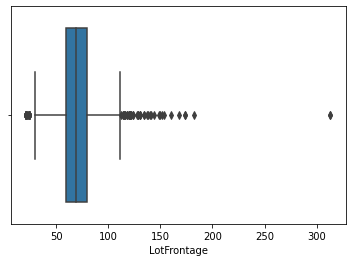

In [24]:
sns.boxplot(x=df2["LotFrontage"])

In [25]:
df2["LotFrontage"].describe()

count    1195.000000
mean       70.030126
std        24.289276
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

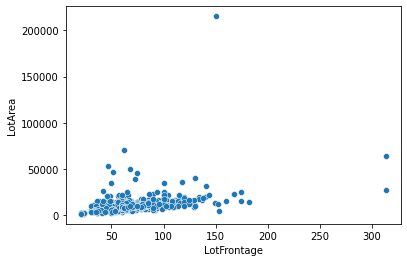

In [26]:
sns.scatterplot(x="LotFrontage", y="LotArea", data=df2)

#### For LotFrontAge, we can see very data clouded near some area
#### Hence we can use median to replace the null values

In [27]:
df2.LotFrontage.fillna(df2.LotFrontage.median(), inplace=True)

C:\Python\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [28]:
df2.isnull().sum().sort_values(ascending=False).head()

GarageYrBlt    81
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
dtype: int64

In [29]:
df2.GarageYrBlt.value_counts()

2005.0    65
2006.0    58
2004.0    53
2003.0    49
2007.0    46
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
1950.0    24
2002.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1957.0    20
2001.0    20
1996.0    20
1997.0    19
1978.0    19
1960.0    19
1954.0    19
1964.0    18
1995.0    18
1994.0    18
1974.0    18
1959.0    17
1956.0    16
1990.0    16
1963.0    16
1967.0    15
1979.0    15
1980.0    15
1969.0    15
1940.0    14
1973.0    14
1972.0    14
1988.0    14
1920.0    14
1955.0    13
1961.0    13
1971.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1989.0    10
1925.0    10
1981.0    10
1985.0    10
1941.0    10
1939.0     9
1991.0     9
1949.0     8
1975.0     8
1930.0     8
1984.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1916.0     5
1922.0     5
1936.0     5
1945.0     4
1946.0     4
1928.0     4
1935.0     4
1982.0     4
1931.0     4
1910.0     3

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

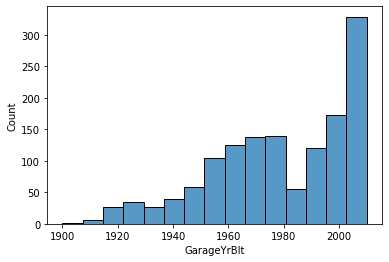

In [30]:
sns.histplot(df.GarageYrBlt)

#### For GarageYrBlt we see multiple values of year
#### So we will transform into categorical by marking between years as below
#### After plotting histogram with the change, we are satisfied and can use this categorical derived variable

In [31]:
def GarageYrBltTimeframe(row):
    if row >= 2005 and row <= 2010:
        return "2005-2010"
    if row >= 2000 and row <= 2004:
        return "2000-2004"
    if row >= 1990 and row <= 1999:
        return "1990-1999"
    if row >= 1980 and row <= 1989:
        return "1980-1989"
    if row >= 1970 and row <= 1979:
        return "1970-1979"
    if row >= 1960 and row <= 1969:
        return "1960-1969"
    if row >= 1950 and row <= 1959:
        return "1950-1959"
    if row <= 1949:
        return "Before1950"
    return "Unknown"

In [32]:
df2.GarageYrBlt.fillna(0.0, inplace=True)

C:\Python\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [33]:
df2["GarageYrBltTime"] = df2.GarageYrBlt.astype(int).apply(lambda row: GarageYrBltTimeframe(row))

C:\Users\JITHAN\AppData\Local\Temp/ipykernel_48500/3828301649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["GarageYrBltTime"] = df2.GarageYrBlt.astype(int).apply(lambda row: GarageYrBltTimeframe(row))


In [34]:
df2.GarageYrBltTime.value_counts()

Before1950    245
2005-2010     222
1990-1999     196
1970-1979     185
1960-1969     185
2000-2004     173
1950-1959     151
1980-1989      95
Name: GarageYrBltTime, dtype: int64

In [35]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenP

<AxesSubplot:xlabel='Count', ylabel='GarageYrBltTime'>

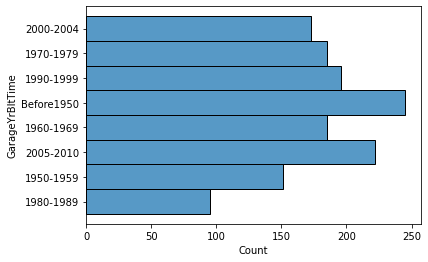

In [36]:
sns.histplot(data=df2, y=df2.GarageYrBltTime )

In [37]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenP

In [38]:
df2 = df2.drop("GarageYrBlt", axis=1)

#### We handle categorial variable by creating dummy variables
#### Also we will remove the original variables after dummy addition

In [39]:
# Convert object variables using dummy variables
dummy = pd.get_dummies(df2[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'GarageYrBltTime']], drop_first=True)
df_new = pd.concat([df2, dummy], axis=1)

In [40]:
df_new.shape

(1452, 289)

In [41]:
for col in ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir',  'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'GarageYrBltTime']:
    df_new.drop(col, inplace=True, axis=1)

In [42]:
df_new.shape

(1452, 250)

In [43]:
df_final = df = df_new

#### We create a RFE model
#### We started with feature count 50 and saw many Inf (infinity) values for VIF
#### Hence we reduced feature counts for RFE and found optimal value at 38 where no VIF is having Inf value


In [44]:
import sklearn
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.8, random_state=100)

In [45]:
# scaling
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()

num_vars = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea']
df_train[num_vars] = Scaler.fit_transform(df_train[num_vars])

In [46]:
# Divide into X & y for model building
y_train = df_train.pop("SalePrice")
X_train = df_train

In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [49]:
rfe = RFE(lm, n_features_to_select=38)

In [50]:
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Id', False, 209),
 ('MSSubClass', False, 51),
 ('LotFrontage', False, 56),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 99),
 ('MasVnrArea', False, 27),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 7),
 ('BsmtUnfSF', False, 6),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 12),
 ('GrLivArea', False, 9),
 ('BsmtFullBath', False, 48),
 ('BsmtHalfBath', False, 152),
 ('FullBath', False, 47),
 ('HalfBath', False, 116),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 64),
 ('GarageCars', False, 4),
 ('GarageArea', False, 79),
 ('WoodDeckSF', False, 63),
 ('OpenPorchSF', False, 158),
 ('EnclosedPorch', False, 202),
 ('3SsnPorch', False, 55),
 ('ScreenPorch', False, 187),
 ('PoolArea', True, 1),
 ('MiscVal', False, 167),
 ('MoSold', False, 171),
 ('YrSold', False, 185),
 ('MSZoning_FV', False, 

In [51]:
# We will consider only significant rows given by rfe with value True for rfe.support_
true_cols = X_train.columns[rfe.support_]

In [52]:
X_train_rfe = X_train[true_cols]

In [53]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     232.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:39:09   Log-Likelihood:                 2187.9
No. Observations:                1161   AIC:                            -4298.
Df Residuals:                    1122   BIC:                            -4101.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0652 

In [54]:
# From summary of model we see, all selected vars are significant
# Lets check VIF as well if there are any correlated variables still left
from statsmodels.stats.outliers_influence import variance_inflation_factor

def print_vif(X_train):
    vif = pd.DataFrame()
    vif["Features"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    print(vif)
    
print_vif(X_train_rfe)

                Features      VIF
0                  const  2019.68
32           BsmtQual_Np    36.66
22      RoofMatl_CompShg    31.48
35       BsmtFinType2_Np    30.51
26      RoofMatl_Tar&Grv    16.28
33           BsmtQual_TA     8.56
6            TotalBsmtSF     8.37
7               1stFlrSF     7.72
27      RoofMatl_WdShake     7.67
31           BsmtQual_Gd     5.77
28      RoofMatl_WdShngl     5.35
11          TotRmsAbvGrd     5.09
8               2ndFlrSF     4.09
2            OverallQual     3.42
4              YearBuilt     3.13
21        RoofStyle_Shed     3.06
24        RoofMatl_Metal     2.75
23      RoofMatl_Membran     2.72
20       Condition2_RRAe     2.59
25         RoofMatl_Roll     2.55
13         LandSlope_Sev     2.45
9           BedroomAbvGr     2.40
30           BsmtQual_Fa     2.14
1                LotArea     1.95
5             BsmtFinSF1     1.64
16  Neighborhood_NridgHt     1.57
34           BsmtCond_Po     1.43
10          KitchenAbvGr     1.39
3            O

#### Residual Analysis to validate Linear Regression

C:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

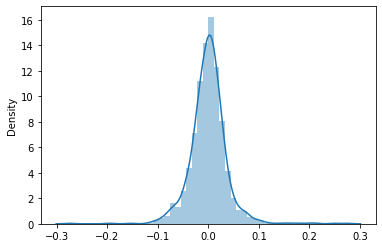

In [55]:
y_train_pred = lm.predict(X_train_rfe)
res = y_train - y_train_pred
sns.distplot(res)

#### Satisifies Normal distribution of Residuals

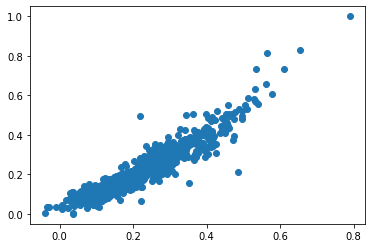

In [56]:
plt.scatter(y_train_pred, y_train)

#### Satisfies homoscedasticity or constant variance from above scatter plot

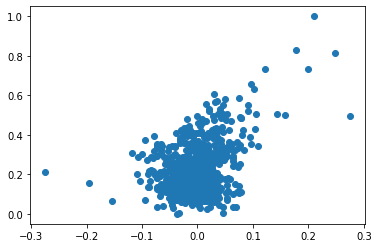

In [57]:
plt.scatter(res, y_train)

#### From this scatter plot we can see that the error terms are independent of each other

In [58]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

#### Ridge Regression

In [59]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for i in lambdas:
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(X_train_rfe, y_train)
    y_pred = ridgereg.predict(X_train_rfe)
    print("with lambda " + str(i) + " r2 score = " + str(r2_score(y_train, y_pred))) 


with lambda 0 r2 score = 0.8837077395424552
with lambda 0.001 r2 score = 0.8874218919494045
with lambda 0.01 r2 score = 0.8869272809840733
with lambda 0.1 r2 score = 0.8739972461902875
with lambda 1 r2 score = 0.8445566862574762
with lambda 10 r2 score = 0.8075638164620544
with lambda 100 r2 score = 0.577270678646473
with lambda 1000 r2 score = 0.18628597422845616


In [60]:
lambda_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]
for i in lambda_list:
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(X_train_rfe, y_train)
    y_pred = ridgereg.predict(X_train_rfe)
    print("with lambda " + str(i) + " r2 score = " + str(r2_score(y_train, y_pred))) 

with lambda 0.001 r2 score = 0.8874218919494045
with lambda 0.002 r2 score = 0.8874041598657355
with lambda 0.003 r2 score = 0.8873755729194092
with lambda 0.004 r2 score = 0.8873368622769071
with lambda 0.005 r2 score = 0.8872887108286355
with lambda 0.006 r2 score = 0.887231756684143
with lambda 0.007 r2 score = 0.8871665963859781
with lambda 0.008 r2 score = 0.8870937878672726
with lambda 0.009 r2 score = 0.887013853175676


In [61]:
0.001 * 0.001

1e-06

In [62]:
lambda_list = [0.001 * 0.001]
for i in lambda_list:
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(X_train_rfe, y_train)
    y_pred = ridgereg.predict(X_train_rfe)
    print("with lambda " + str(i) + " r2 score = " + str(r2_score(y_train, y_pred))) 

with lambda 1e-06 r2 score = 0.8874279859172068


In [63]:
lambda_final = 0.001
ridgereg = Ridge(alpha = lambda_final)
ridgereg.fit(X_train_rfe, y_train)
y_pred = ridgereg.predict(X_train_rfe)
print("with lambda " + str(lambda_final) + " r2 score = " + str(r2_score(y_train, y_pred)))
ridge_data = { "feature": X_train_rfe.columns, "coef": ridgereg.coef_, "abs_coef": abs(ridgereg.coef_)}
print(pd.DataFrame(ridge_data).sort_values(by="abs_coef", ascending=False))

with lambda 0.001 r2 score = 0.8874218919494045
                 feature      coef  abs_coef
23      RoofMatl_Membran  1.088283  1.088283
24        RoofMatl_Metal  1.071875  1.071875
26      RoofMatl_Tar&Grv  0.991430  0.991430
28      RoofMatl_WdShngl  0.983055  0.983055
22      RoofMatl_CompShg  0.981674  0.981674
25         RoofMatl_Roll  0.971423  0.971423
27      RoofMatl_WdShake  0.960010  0.960010
6            TotalBsmtSF  0.343519  0.343519
19       Condition2_PosN -0.291850  0.291850
7               1stFlrSF  0.267732  0.267732
1                LotArea  0.255889  0.255889
8               2ndFlrSF  0.169296  0.169296
20       Condition2_RRAe -0.167097  0.167097
5             BsmtFinSF1  0.151714  0.151714
2            OverallQual  0.138893  0.138893
36        Functional_Sev -0.126333  0.126333
21        RoofStyle_Shed  0.111189  0.111189
10          KitchenAbvGr -0.105718  0.105718
4              YearBuilt  0.103873  0.103873
3            OverallCond  0.088286  0.088286
9      

In [64]:
lambda_final = 0.001 * 0.001 
ridgereg = Ridge(alpha = lambda_final)
ridgereg.fit(X_train_rfe, y_train)
y_pred = ridgereg.predict(X_train_rfe)
print("with lambda " + str(lambda_final) + " r2 score = " + str(r2_score(y_train, y_pred)))
ridge_data = { "feature": X_train_rfe.columns, "coef": ridgereg.coef_, "abs_coef": abs(ridgereg.coef_)}
print(pd.DataFrame(ridge_data).sort_values(by="abs_coef", ascending=False))

with lambda 1e-06 r2 score = 0.8874279859172068
                 feature      coef  abs_coef
23      RoofMatl_Membran  1.100949  1.100949
24        RoofMatl_Metal  1.084601  1.084601
26      RoofMatl_Tar&Grv  1.002617  1.002617
28      RoofMatl_WdShngl  0.994054  0.994054
22      RoofMatl_CompShg  0.992665  0.992665
25         RoofMatl_Roll  0.983377  0.983377
27      RoofMatl_WdShake  0.971395  0.971395
6            TotalBsmtSF  0.346867  0.346867
19       Condition2_PosN -0.292696  0.292696
7               1stFlrSF  0.267153  0.267153
1                LotArea  0.256738  0.256738
8               2ndFlrSF  0.169862  0.169862
20       Condition2_RRAe -0.167813  0.167813
5             BsmtFinSF1  0.152293  0.152293
2            OverallQual  0.138515  0.138515
36        Functional_Sev -0.126730  0.126730
21        RoofStyle_Shed  0.111496  0.111496
10          KitchenAbvGr -0.105929  0.105929
4              YearBuilt  0.103872  0.103872
3            OverallCond  0.088410  0.088410
9      

#### Lasso Regression

In [65]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]


for i in lambdas:
    lassoreg = Lasso(alpha = i) 
    lassoreg.fit(X_train_rfe, y_train)
    y_pred = lassoreg.predict(X_train_rfe)
    print("with lambda " + str(i) + " r2 score = " + str(r2_score(y_train, y_pred))) 


with lambda 0 r2 score = 0.8874279859234429
with lambda 0.001 r2 score = 0.7698614755766873
with lambda 0.01 r2 score = 0.26435874639237944
with lambda 0.1 r2 score = 0.0
with lambda 1 r2 score = 0.0
with lambda 10 r2 score = 0.0
with lambda 100 r2 score = 0.0
with lambda 1000 r2 score = 0.0


In [66]:
lambdas = [0.00001, 0.0001]

for i in lambdas:
    lassoreg = Lasso(alpha = i) 
    lassoreg.fit(X_train_rfe, y_train)
    y_pred = lassoreg.predict(X_train_rfe)
    print("with lambda " + str(i) + " r2 score = " + str(r2_score(y_train, y_pred))) 

with lambda 1e-05 r2 score = 0.8862645807375794
with lambda 0.0001 r2 score = 0.8367212132410713


In [67]:
lambda_list = [0.00001 * 0.00001]
for i in lambda_list:
    lassoreg = Lasso(alpha = i) 
    lassoreg.fit(X_train_rfe, y_train)
    y_pred = lassoreg.predict(X_train_rfe)
    print("with lambda " + str(i) + " r2 score = " + str(r2_score(y_train, y_pred))) 

with lambda 1.0000000000000002e-10 r2 score = 0.8874279859233256


In [68]:
lambda_final = 0.00001
lassoreg = Lasso(alpha = lambda_final)
lassoreg.fit(X_train_rfe, y_train)
y_pred = lassoreg.predict(X_train_rfe)
print("with lambda " + str(lambda_final) + " r2 score = " + str(r2_score(y_train, y_pred)))
lasso_data = { "feature": X_train_rfe.columns, "coef": lassoreg.coef_, "abs_coef": abs(lassoreg.coef_)}
print(pd.DataFrame(lasso_data).sort_values(by="abs_coef", ascending=False))

with lambda 1e-05 r2 score = 0.8862645807375794
                 feature      coef  abs_coef
23      RoofMatl_Membran  0.938329  0.938329
24        RoofMatl_Metal  0.919885  0.919885
26      RoofMatl_Tar&Grv  0.860850  0.860850
28      RoofMatl_WdShngl  0.857710  0.857710
22      RoofMatl_CompShg  0.855751  0.855751
27      RoofMatl_WdShake  0.835961  0.835961
25         RoofMatl_Roll  0.835250  0.835250
6            TotalBsmtSF  0.297630  0.297630
7               1stFlrSF  0.278922  0.278922
19       Condition2_PosN -0.277049  0.277049
1                LotArea  0.234363  0.234363
8               2ndFlrSF  0.162531  0.162531
5             BsmtFinSF1  0.145970  0.145970
2            OverallQual  0.145130  0.145130
20       Condition2_RRAe -0.114460  0.114460
36        Functional_Sev -0.109176  0.109176
4              YearBuilt  0.103211  0.103211
10          KitchenAbvGr -0.101933  0.101933
3            OverallCond  0.085537  0.085537
9           BedroomAbvGr -0.080330  0.080330
21     

In [69]:
lambda_final = 0.00001 * 0.00001
lassoreg = Lasso(alpha = lambda_final)
lassoreg.fit(X_train_rfe, y_train)
y_pred = lassoreg.predict(X_train_rfe)
print("with lambda " + str(lambda_final) + " r2 score = " + str(r2_score(y_train, y_pred)))
lasso_data = { "feature": X_train_rfe.columns, "coef": lassoreg.coef_, "abs_coef": abs(lassoreg.coef_)}
print(pd.DataFrame(lasso_data).sort_values(by="abs_coef", ascending=False))

with lambda 1.0000000000000002e-10 r2 score = 0.8874279859233256
                 feature      coef  abs_coef
23      RoofMatl_Membran  1.100960  1.100960
24        RoofMatl_Metal  1.084612  1.084612
26      RoofMatl_Tar&Grv  1.002626  1.002626
28      RoofMatl_WdShngl  0.994064  0.994064
22      RoofMatl_CompShg  0.992675  0.992675
25         RoofMatl_Roll  0.983387  0.983387
27      RoofMatl_WdShake  0.971405  0.971405
6            TotalBsmtSF  0.346870  0.346870
19       Condition2_PosN -0.292697  0.292697
7               1stFlrSF  0.267152  0.267152
1                LotArea  0.256739  0.256739
8               2ndFlrSF  0.169862  0.169862
20       Condition2_RRAe -0.167813  0.167813
5             BsmtFinSF1  0.152294  0.152294
2            OverallQual  0.138514  0.138514
36        Functional_Sev -0.126730  0.126730
21        RoofStyle_Shed  0.111496  0.111496
10          KitchenAbvGr -0.105929  0.105929
4              YearBuilt  0.103872  0.103872
3            OverallCond  0.088410 